# Algoritmo MeanShift

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo MeanShift]()

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from utils.parametros import ParametrosMeanshift
from sklearn.cluster import estimate_bandwidth
from sklearn.impute import SimpleImputer
from models.meanshift import Meanshift
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")
df_ureia = pd.read_csv("../databases/processed/ureia_pivoted.csv", sep = ",", index_col = "subject_id")
df_creatinina = pd.read_csv("../databases/processed/creatinina_pivoted.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

### DATASET Funcao Renal

In [3]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = df_funcao_renal, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500)
    meanshift.fit(df_funcao_renal)
    y_funcao_renal = meanshift.fit_predict(df_funcao_renal)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(df_funcao_renal, y_funcao_renal, metric = metrica))

    davies_bouldin = davies_bouldin_score(df_funcao_renal, y_funcao_renal)
    calinski = calinski_harabasz_score(df_funcao_renal, y_funcao_renal)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [1.0, -0.00013345789403449188, 1.0, 1.0, 1.0, 1.0]
DAVIS-BOULDIN SCORE:  0.0
CALINSKI-HARABASZ SCORE:  1.0


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.767706173302503, 0.12370790505587803, 0.7645057772236232, 0.767706173302503, 0.7645057772236232, 0.767706173302503]
DAVIS-BOULDIN SCORE:  0.7393294782399168
CALINSKI-HARABASZ SCORE:  21579.78483257319


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.7820985425449464, 0.02397030346205312, 0.7738723041669752, 0.7820985425449464, 0.7738723041669752, 0.7820985425449464]
DAVIS-BOULDIN SCORE:  0.6926368214558204
CALINSKI-HARABASZ SCORE:  21912.91814080217


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.7445469068674132, 0.14252289831332657, 0.7189695777536332, 0.7445469068674132, 0.7189695777536332, 0.7445469068674132]
DAVIS-BOULDIN SCORE:  0.8108048477735894
CALINSKI-HARABASZ SCORE:  18584.83559834333


PARA O QUANTIL < 0.5 >

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma, exceto "cosine";
- quantil: 0.2;
- frequência mínima: 1;
- número máximo de iterações: 500;
- semente randômica: 42.

### DATASET Dieta Grupos

In [4]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = df_dieta_grupos, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500)
    meanshift.fit(df_dieta_grupos)
    y_dieta_grupos = meanshift.fit_predict(df_dieta_grupos)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(df_dieta_grupos, y_dieta_grupos, metric = metrica))

    davies_bouldin = davies_bouldin_score(df_dieta_grupos, y_dieta_grupos)
    calinski = calinski_harabasz_score(df_dieta_grupos, y_dieta_grupos)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.14783360272991927, -0.586399347158496, 0.1893650130593205, 0.14783360272991927, 0.1893650130593205, 0.14783360272991927]
DAVIS-BOULDIN SCORE:  1.1763008775949684
CALINSKI-HARABASZ SCORE:  139.85322497688574


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.22561520282267178, -0.5916939477539512, 0.2421173795311405, 0.22561520282267178, 0.2421173795311405, 0.22561520282267178]
DAVIS-BOULDIN SCORE:  1.1147975968368442
CALINSKI-HARABASZ SCORE:  153.98846696197288


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.2386684790528939, -0.5870436959106852, 0.2645822490873655, 0.2386684790528939, 0.2645822490873655, 0.2386684790528939]
DAVIS-BOULDIN SCORE:  1.052293240060704
CALINSKI-HARABASZ SCORE:  134.09984291300785


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.24317731149290167, -0.5927387201841084, 0.3359935243747827, 0.24317731149290167, 0.3359935243747827, 0.243177311492901

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma, exceto "euclidean";
- quantil: 0.6;
- frequência mínima: 1;
- número máximo de iterações: 500;
- semente randômica: 42.

### DATASET Perfil Hepatico

In [5]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = df_perfil_hepatico, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500)
    meanshift.fit(df_perfil_hepatico)
    y_perfil_hepatico = meanshift.fit_predict(df_perfil_hepatico)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(df_perfil_hepatico, y_perfil_hepatico, metric = metrica))

    davies_bouldin = davies_bouldin_score(df_perfil_hepatico, y_perfil_hepatico)
    calinski = calinski_harabasz_score(df_perfil_hepatico, y_perfil_hepatico)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5591197380759249, -0.09945565098983042, 0.5273898315871121, 0.5591197380759249, 0.5273898315871121, 0.5591197380759249]
DAVIS-BOULDIN SCORE:  1.1573282447520783
CALINSKI-HARABASZ SCORE:  1696.3939534258216


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5630997029087442, -0.085850168073472, 0.5319133748993254, 0.5630997029087442, 0.5319133748993254, 0.5630997029087442]
DAVIS-BOULDIN SCORE:  1.2716137520125304
CALINSKI-HARABASZ SCORE:  1753.888294547341


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5788718316128073, -0.09457566982501672, 0.5391172113839361, 0.5788718316128073, 0.5391172113839361, 0.5788718316128073]
DAVIS-BOULDIN SCORE:  1.203818111350865
CALINSKI-HARABASZ SCORE:  3009.7597145498235


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.5998464517668343, -0.07679397691067627, 0.5680426285666547, 0.5998464517668343, 0.5680426285666547, 0.5998464517668343]
DAV

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma, exceto "cityblock";
- quantil: 0.6;
- frequência mínima: 1;
- número máximo de iterações: 500;
- semente randômica: 42.

### DATASET ureia

In [10]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_ureia_sem_nulos = simple_input.fit_transform(df_ureia.values)

In [11]:
X_train, X_test = train_test_split(df_ureia_sem_nulos, test_size = 0.3, random_state = 42)

In [12]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = X_test, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500,
                          nro_threads = -1)
    meanshift.fit(X_train)
    y_ureia = meanshift.predict(X_test)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(X_test, y_ureia, metric = metrica))

    davies_bouldin = davies_bouldin_score(X_test, y_ureia)
    calinski = calinski_harabasz_score(X_test, y_ureia)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9932981836582119, 0.8394643289350867, 0.9927749725165369, 0.9932981836582119, 0.9927749725165369, 0.9932981836582119]
DAVIS-BOULDIN SCORE:  0.004757902844252656
CALINSKI-HARABASZ SCORE:  330.66878203527716


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9932981836582119, 0.8394643289350867, 0.9927749725165369, 0.9932981836582119, 0.9927749725165369, 0.9932981836582119]
DAVIS-BOULDIN SCORE:  0.004757902844252656
CALINSKI-HARABASZ SCORE:  330.66878203527716


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9932981836582119, 0.8394643289350867, 0.9927749725165369, 0.9932981836582119, 0.9927749725165369, 0.9932981836582119]
DAVIS-BOULDIN SCORE:  0.004757902844252656
CALINSKI-HARABASZ SCORE:  330.66878203527716


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9932981836582119, 0.8394643289350867, 0.9927749725165369, 0.9932981836582119, 0.9927749725165369, 0.9932981836582119]
D

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma;
- quantil: 0.5;
- frequência mínima: 2;
- número máximo de iterações: 500;
- semente randômica: 42.

### DATASET creatinina

In [15]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_creatinina_sem_nulos = simple_input.fit_transform(df_creatinina.values)

In [16]:
X_train, X_test = train_test_split(df_creatinina_sem_nulos, test_size = 0.3, random_state = 42)

In [17]:
quantis_escolhidos = [0.2, 0.25, 0.3, 0.4, 0.5, 0.6]

for quantil in quantis_escolhidos:
    bandwidth = estimate_bandwidth(X = X_test, quantile = quantil, random_state = 42)
    meanshift = Meanshift(bandwidth = bandwidth,
                          nro_max_iteracoes = 500,
                          nro_threads = -1)
    meanshift.fit(X_train)
    y_ureia = meanshift.predict(X_test)
    
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(X_test, y_ureia, metric = metrica))

    davies_bouldin = davies_bouldin_score(X_test, y_ureia)
    calinski = calinski_harabasz_score(X_test, y_ureia)

    print(f"PARA O QUANTIL < {quantil} > OS RESULTADOS SÃO:", end = "\n")
    print("=" * 20)
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")
    print("=" * 20, end = "\n\n\n")

PARA O QUANTIL < 0.2 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9974775585973711, 0.9188348207078608, 0.997275062539165, 0.9974775585973711, 0.997275062539165, 0.9974775585973711]
DAVIS-BOULDIN SCORE:  0.00201006102369348
CALINSKI-HARABASZ SCORE:  993.0020264109411


PARA O QUANTIL < 0.25 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9974775585973711, 0.9188348207078608, 0.997275062539165, 0.9974775585973711, 0.997275062539165, 0.9974775585973711]
DAVIS-BOULDIN SCORE:  0.00201006102369348
CALINSKI-HARABASZ SCORE:  993.0020264109411


PARA O QUANTIL < 0.3 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9974775585973711, 0.9188348207078608, 0.997275062539165, 0.9974775585973711, 0.997275062539165, 0.9974775585973711]
DAVIS-BOULDIN SCORE:  0.00201006102369348
CALINSKI-HARABASZ SCORE:  993.0020264109411


PARA O QUANTIL < 0.4 > OS RESULTADOS SÃO:
SILHOUETTE SCORE:  [0.9974775585973711, 0.9188348207078608, 0.997275062539165, 0.9974775585973711, 0.997275062539165, 0.9974775585973711]
DAVIS-BOULDIN S

Como podemos notar acima, os melhores parâmetros são:
- métrica: qualquer uma;
- quantil: 0.5;
- frequência mínima: 3;
- número máximo de iterações: 500;
- semente randômica: 42.

## Implementação do Algoritmo

### DATASET Funcao Renal

#### Recebendo os hiper-parâmetros testados acima

In [17]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "funcao_renal")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [19]:
bandwidth = estimate_bandwidth(X = df_funcao_renal,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica())

meanshift_funcao_renal = Meanshift(bandwidth = bandwidth,
                                   usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                   frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                   clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                   nro_threads = hiperparametros_meanshift.getNro_threads(),
                                   nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_funcao_renal.fit(df_funcao_renal.values)
y_funcao_renal = meanshift_funcao_renal.fit_predict(df_funcao_renal.values)

##### Verificando resultados do modelo

In [20]:
silhouette = silhouette_score(df_funcao_renal.values, y_funcao_renal, metric = "cosine")
davies_bouldin = davies_bouldin_score(df_funcao_renal.values, y_funcao_renal)
calinski = calinski_harabasz_score(df_funcao_renal.values, y_funcao_renal)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.03444965122870434
DAVIS-BOULDIN SCORE:  0.6012694218729446
CALINSKI-HARABASZ SCORE:  36249.40726125835


### DATASET Dieta Grupos

#### Recebendo os hiper-parâmetros testados acima

In [21]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "dieta_grupos")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [22]:
bandwidth = estimate_bandwidth(X = df_dieta_grupos,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica())

meanshift_dieta_grupos = Meanshift(bandwidth = bandwidth,
                                   usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                   frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                   clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                   nro_threads = hiperparametros_meanshift.getNro_threads(),
                                   nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_dieta_grupos.fit(df_dieta_grupos.values)
y_dieta_grupos = meanshift_dieta_grupos.fit_predict(df_dieta_grupos.values)

##### Verificando resultados do modelo

In [23]:
silhouette = silhouette_score(df_dieta_grupos.values, y_dieta_grupos, metric = "euclidean")
davies_bouldin = davies_bouldin_score(df_dieta_grupos.values, y_dieta_grupos)
calinski = calinski_harabasz_score(df_dieta_grupos.values, y_dieta_grupos)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.6363630240666491
DAVIS-BOULDIN SCORE:  0.9513520035275501
CALINSKI-HARABASZ SCORE:  45.338656719227124


### DATASET Perfil Hepatico

#### Recebendo os hiper-parâmetros testados acima

In [24]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "perfil_hepatico")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [25]:
bandwidth = estimate_bandwidth(X = df_perfil_hepatico,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica())

meanshift_perfil_hepatico = Meanshift(bandwidth = bandwidth,
                                      usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                      frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                      clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                      nro_threads = hiperparametros_meanshift.getNro_threads(),
                                      nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_perfil_hepatico.fit(df_perfil_hepatico.values)
y_perfil_hepatico = meanshift_perfil_hepatico.fit_predict(df_perfil_hepatico.values)

##### Verificando resultados do modelo

In [26]:
silhouette = silhouette_score(df_perfil_hepatico.values, y_perfil_hepatico, metric = "cityblock")
davies_bouldin = davies_bouldin_score(df_perfil_hepatico.values, y_perfil_hepatico)
calinski = calinski_harabasz_score(df_perfil_hepatico.values, y_perfil_hepatico)

print("SILHOUETTE SCORE: ", silhouette, end = "\n")
print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.6509502312202577
DAVIS-BOULDIN SCORE:  0.8395679711104772
CALINSKI-HARABASZ SCORE:  8324.27521262369


### DATASET ureia

#### Recebendo os hiper-parâmetros testados acima

In [5]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "ureia")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [3]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_ureia_sem_nulos = simple_input.fit_transform(df_ureia.values)

In [6]:
X_train, X_test = train_test_split(df_ureia_sem_nulos, test_size = 0.3, random_state = hiperparametros_meanshift.getSemente_randomica())

In [7]:
bandwidth = estimate_bandwidth(X = df_ureia_sem_nulos,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica())

meanshift_ureia = Meanshift(bandwidth = bandwidth,
                            usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                            frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                            clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                            nro_threads = hiperparametros_meanshift.getNro_threads(),
                            nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_ureia.fit(X_train)
y_ureia = meanshift_ureia.predict(X_test)

##### Verificando resultados do modelo

In [8]:
if len(np.unique(meanshift_ureia.getLabels())) > 1:
    silhouette = silhouette_score(X_test, y_ureia, metric = "cityblock")
    davies_bouldin = davies_bouldin_score(X_test, y_ureia)
    calinski = calinski_harabasz_score(X_test, y_ureia)

    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.992798917984213
DAVIS-BOULDIN SCORE:  0.006024636348133094
CALINSKI-HARABASZ SCORE:  248.25227691122095


In [11]:
np.unique(meanshift_ureia.getLabels())

array([0, 1, 2])

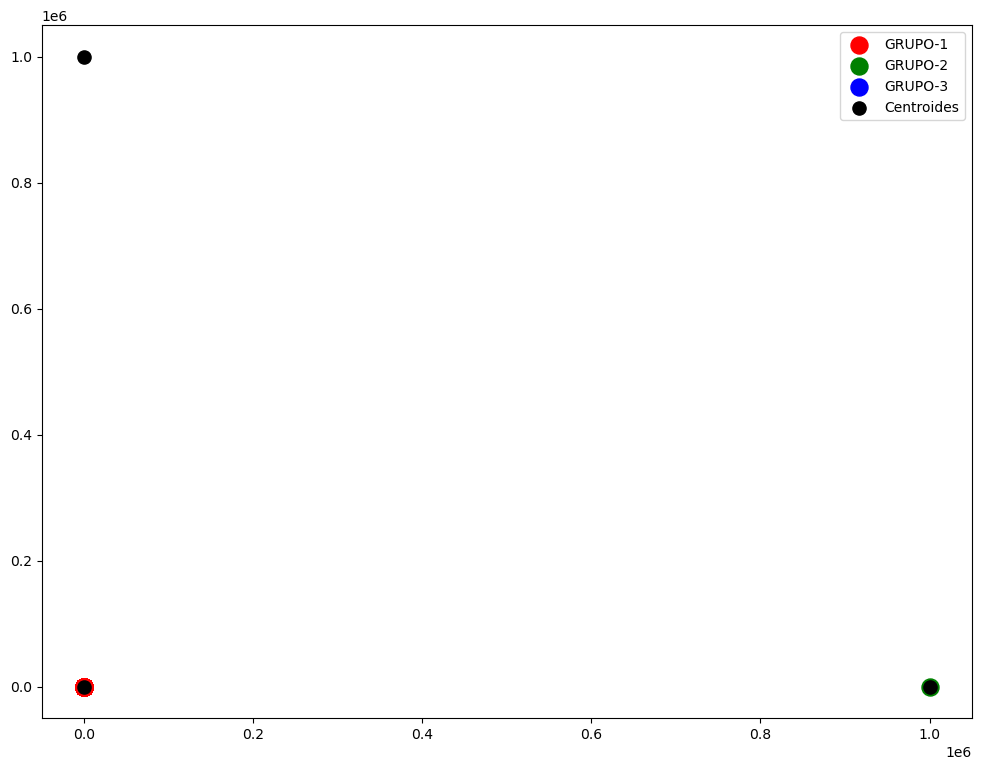

In [12]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_test[y_ureia == 0, 0], X_test[y_ureia == 0, 1], s = 150, c = "red", label = "GRUPO-1")
plt.scatter(X_test[y_ureia == 1, 0], X_test[y_ureia == 1, 1], s = 150, c = "green", label = "GRUPO-2")
plt.scatter(X_test[y_ureia == 2, 0], X_test[y_ureia == 2, 1], s = 150, c = "blue", label = "GRUPO-3")

### OS CENTROIDES
plt.scatter(meanshift_ureia.getCentroides()[:, 0], meanshift_ureia.getCentroides()[:, 1], s = 90, c = "black", label = "Centroides")

plt.legend()
plt.show()

### DATASET creatinina

#### Recebendo os hiper-parâmetros testados acima

In [13]:
hiperparametros_meanshift = ParametrosMeanshift(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_meanshift.txt", nome_dataset = "creatinina")

#### Criando o modelo - seguindo o resultado alcançado nos testes acima

In [14]:
simple_input = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df_creatinina_sem_nulos = simple_input.fit_transform(df_creatinina.values)

In [15]:
X_train, X_test = train_test_split(df_creatinina_sem_nulos, test_size = 0.3, random_state = hiperparametros_meanshift.getSemente_randomica())

In [16]:
bandwidth = estimate_bandwidth(X = df_perfil_hepatico,
                               quantile = hiperparametros_meanshift.getQuantil(),
                               random_state = hiperparametros_meanshift.getSemente_randomica())

meanshift_creatinina = Meanshift(bandwidth = bandwidth,
                                 usar_versao_discreta_pontos = hiperparametros_meanshift.getUsar_versao_discreta_pontos(),
                                 frequencia_minima = hiperparametros_meanshift.getFrequencia_minima(),
                                 clusterizar_todos_pontos = hiperparametros_meanshift.getClusterizar_todos_pontos(),
                                 nro_threads = hiperparametros_meanshift.getNro_threads(),
                                 nro_max_iteracoes = hiperparametros_meanshift.getNro_max_iteracoes())

meanshift_creatinina.fit(X_train)
y_creatinina = meanshift_creatinina.predict(X_test)

##### Verificando resultados do modelo

In [17]:
if len(np.unique(meanshift_creatinina.getLabels())) > 1:
    silhouette = silhouette_score(X_test, y_creatinina, metric = "cityblock")
    davies_bouldin = davies_bouldin_score(X_test, y_creatinina)
    calinski = calinski_harabasz_score(X_test, y_creatinina)

    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")
    print("CALINSKI-HARABASZ SCORE: ", calinski, end = "\n")

SILHOUETTE SCORE:  0.6113471233050558
DAVIS-BOULDIN SCORE:  2.3197258579383973
CALINSKI-HARABASZ SCORE:  13.663299834027452


In [18]:
np.unique(meanshift_creatinina.getLabels())

array([0, 1, 2])

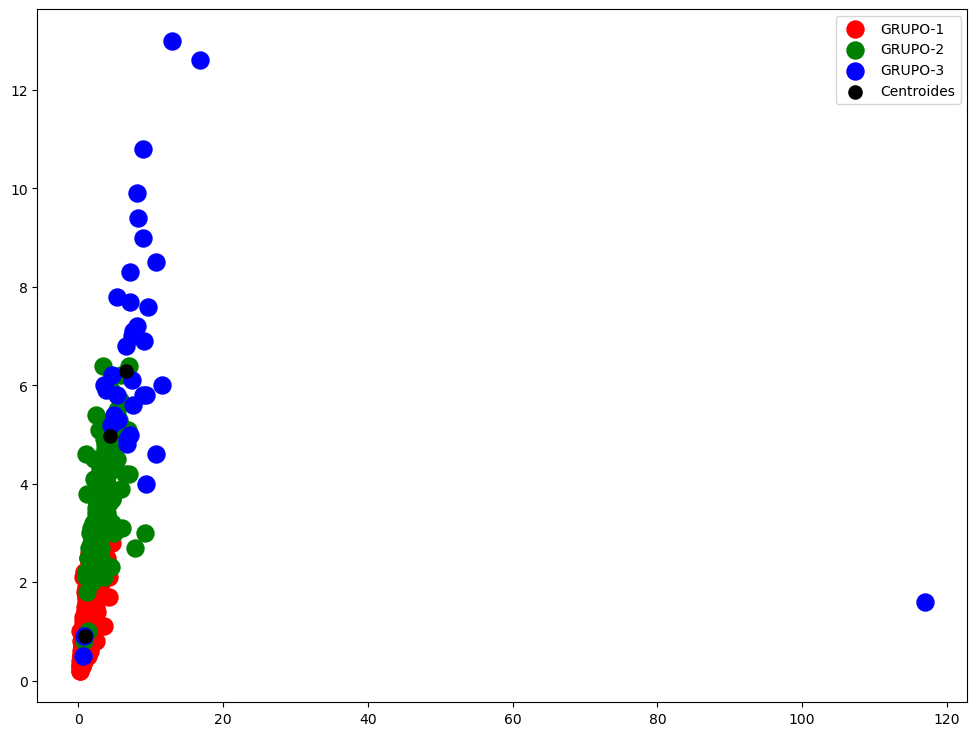

In [19]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_test[y_creatinina == 0, 0], X_test[y_creatinina == 0, 1], s = 150, c = "red", label = "GRUPO-1")
plt.scatter(X_test[y_creatinina == 1, 0], X_test[y_creatinina == 1, 1], s = 150, c = "green", label = "GRUPO-2")
plt.scatter(X_test[y_creatinina == 2, 0], X_test[y_creatinina == 2, 1], s = 150, c = "blue", label = "GRUPO-3")

### OS CENTROIDES
plt.scatter(meanshift_creatinina.getCentroides()[:, 0], meanshift_creatinina.getCentroides()[:, 1], s = 90, c = "black", label = "Centroides")

plt.legend()
plt.show()